
# The Workflow

<img src="./ml_workflow.png" width=400 heigth=400></img>

# Machine Learning Workflow for titanic dataset

Let's go through the machine learning workflow using a familiar dataset.



In [3]:
import pandas as pd
import numpy as np

## 1. Define (Business) Goal

A Goal should be measurable


**Titanic:**
> Predict who survived and who died<br>
> Arbitrarily: We want an accuracy of the model that is higher than 0.77

**Accuracy:** Ratio of correct predictions over all cases. What is the percentage of correctly classified cases.

**Loss:** Difference between y and y_hat


## 2. Get Data

For the penguins data and for the titanic data we just have to load a .csv file.


Potential data sources:
- Databases
- Create your own data (simulation) / run a survey
- Sensors / Devices that measure data
- Web scraping/API (Application Programming Interface)

In [4]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df_train.shape

(891, 12)

In [6]:
df_test.shape

(418, 11)

## 3. Train-Validation-Test-Split

- We want to split our data set in data to train, to validate and to test:
    - Train data: the samples of data used to fit the model.
    - Validation data: the samples of data used to evaluate the model while fine-tuning the model hyperparameters
    - Test data: the samples of data used to evaluate the model
- The model should not see the test data until the end, when we use it to evaluate the performance of the model.

What is the purpose of splitting the data? - We want to be able to detect if our model is overfitting.
The splitting the data does not help to prevent overfitting but it helps to detect overfitting.

**Overfitting:**

Algorithm is to some extent memorizing the correct answers for the training data. This means that it will not work well on data it has not been trained on. The model does not **generalize** well.

### 3.1 Separate features and label (target)
- `X`:= is the array of features used to predict. It's a multidimensional array (or matrix, or a dataframe in pandas)
- `y`:= is the array of labels to be predicted. It's an array with a single dimension (or a vector, or a series in pandas)

In [7]:
df_train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0000,B102,S
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S
809,810,1,1,"Chambers, Mrs. Norman Campbell (Bertha Griggs)",female,33.0,1,0,113806,53.1000,E8,S
126,127,0,3,"McMahon, Mr. Martin",male,NaN,0,0,370372,7.7500,NaN,Q
301,302,1,3,"McCoy, Mr. Bernard",male,NaN,2,0,367226,23.2500,NaN,Q
772,773,0,2,"Mack, Mrs. (Mary)",female,57.0,0,0,S.O./P.P. 3,10.5000,E77,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S
665,666,0,2,"Hickman, Mr. Lewis",male,32.0,2,0,S.O.C. 14879,73.5000,NaN,S
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
521,522,0,3,"Vovk, Mr. Janko",male,22.0,0,0,349252,7.8958,NaN,S


In [8]:
X_train = df_train.loc[:, df_train.columns != 'Survived']
y_train = df_train['Survived'].to_frame()

In the Titanic dataset your y is the column **Survived**

### 3.2 Train-Test split

In [9]:
#!conda install -c conda-forge scikit-learn
#!pip install scikit-learn

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# using the train test split function
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train ,
                                   random_state=104,
                                   stratify=y_train,
                                   test_size=0.2, 
                                   shuffle=True)


In [12]:
# Always check the shape of your train and test arrays to check if this was done correctly
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((712, 11), (179, 11), (712, 1), (179, 1))

## 4. Explore the Data

Done extensively last week, some ideas:
-  create plots
- `sns.pairplot()`
- `df.describe()`
- `df.info()`
- check/plot correlations etc etc

This is only done on the training data!!!. That means you have to:
* merge your `X_train` and `y_train` from the previous step into `df_train`

In [13]:
df_train = pd.concat([X_train, y_train], axis=1)
df_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
805,806,3,"Johansson, Mr. Karl Johan",male,31.0,0,0,347063,7.775,NaN,S,0
665,666,2,"Hickman, Mr. Lewis",male,32.0,2,0,S.O.C. 14879,73.500,NaN,S,0
320,321,3,"Dennis, Mr. Samuel",male,22.0,0,0,A/5 21172,7.250,NaN,S,0
667,668,3,"Rommetvedt, Mr. Knud Paust",male,NaN,0,0,312993,7.775,NaN,S,0
763,764,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.000,B96 B98,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
452,453,1,"Foreman, Mr. Benjamin Laventall",male,30.0,0,0,113051,27.750,C111,C,0
376,377,3,"Landergren, Miss. Aurora Adelia",female,22.0,0,0,C 7077,7.250,NaN,S,1
282,283,3,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,345778,9.500,NaN,S,0
612,613,3,"Murphy, Miss. Margaret Jane",female,NaN,1,0,367230,15.500,NaN,Q,1


In [14]:
import seaborn as sns

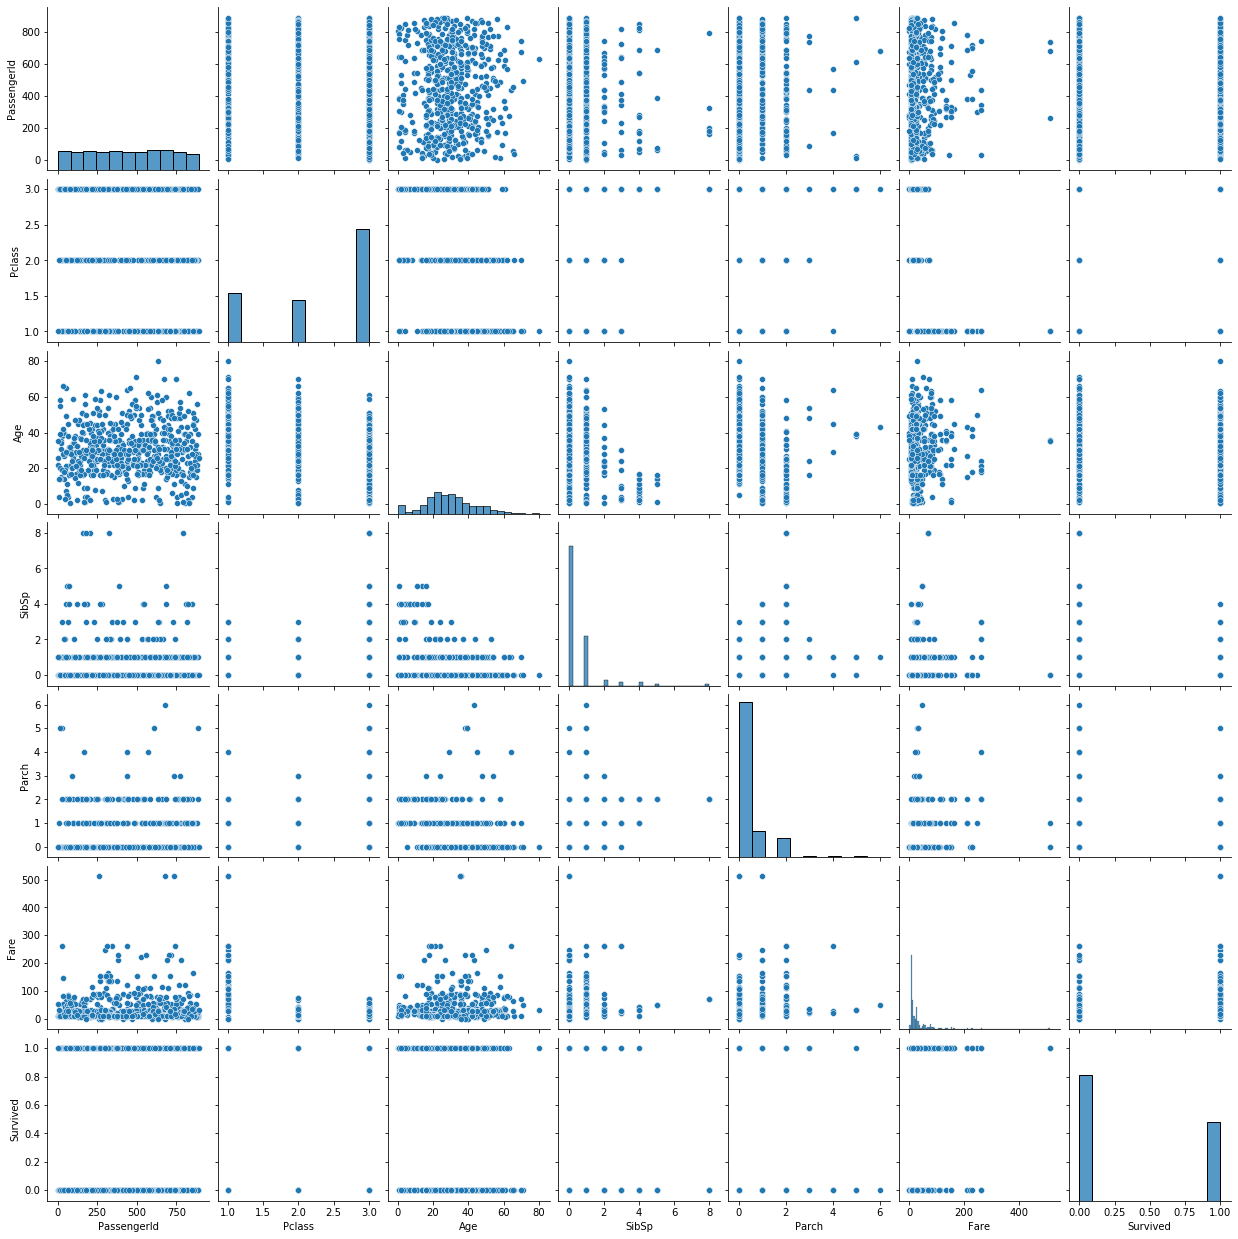

In [15]:
sns.pairplot(df_train)

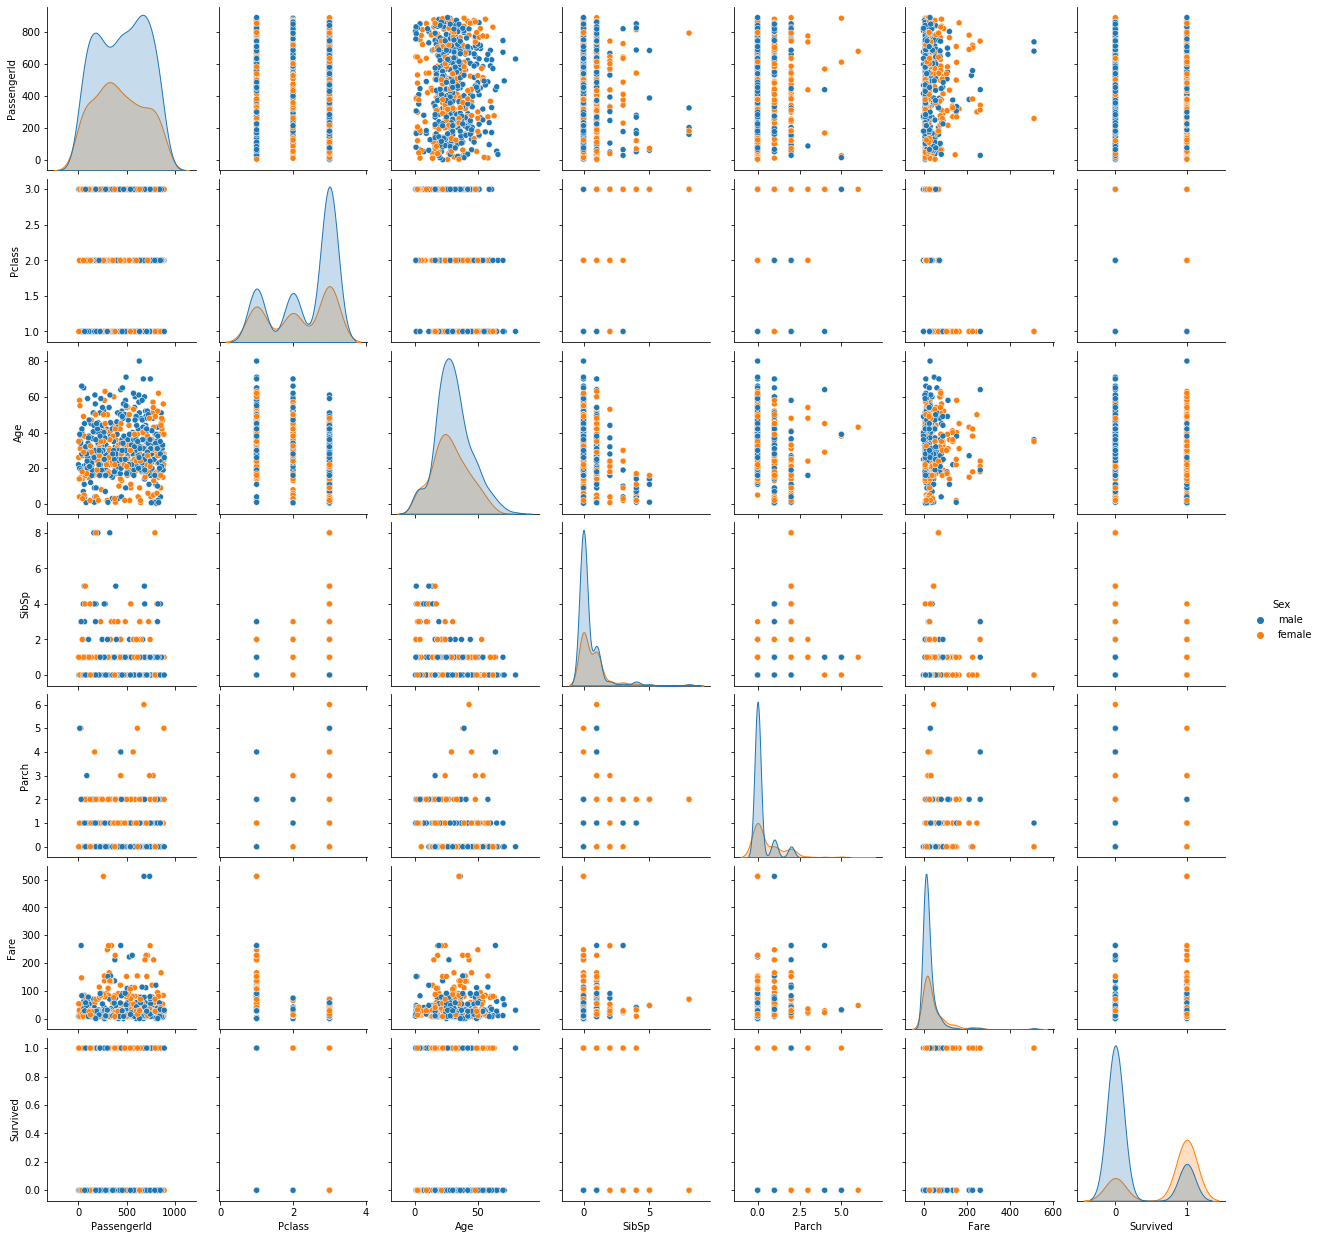

In [18]:
sns.pairplot(df_train, hue ='Sex')
#sns.pairplot(df_train, hue ='Pclass')

In [19]:
df_train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,712.000000,712.000000,564.000000,712.000000,712.000000,712.000000,712.000000
mean,441.924157,2.314607,29.688688,0.509831,0.384831,32.675614,0.383427
std,254.523155,0.833146,14.285254,1.071253,0.813525,52.120393,0.486563
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.750000,2.000000,20.875000,0.000000,0.000000,7.917700,0.000000
50%,441.500000,3.000000,28.250000,0.000000,0.000000,14.454200,0.000000
75%,663.250000,3.000000,38.000000,1.000000,0.000000,30.548950,1.000000
max,890.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 805 to 634
Data columns (total 12 columns):
PassengerId    712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            564 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
Cabin          162 non-null object
Embarked       710 non-null object
Survived       712 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.3+ KB


## Step 2: 
Calculate the number of surviving/non-surviving passengers and display it as a bar plot.

### First approach

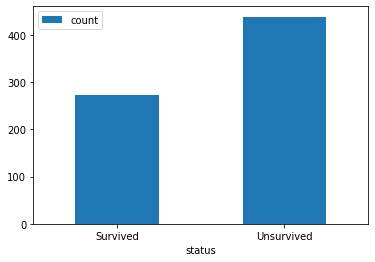

In [21]:
from matplotlib import pyplot as plt


survivors_data = len(df_train.loc[df_train['Survived'] == 1]['Survived'])
unsurvivors_data = len(df_train.loc[df_train['Survived'] == 0]['Survived'])

df = pd.DataFrame({'status':['Survived', 'Unsurvived'], 'count':[survivors_data, unsurvivors_data]})
ax = df.plot.bar(x='status', y='count', rot=0)


### Second approach

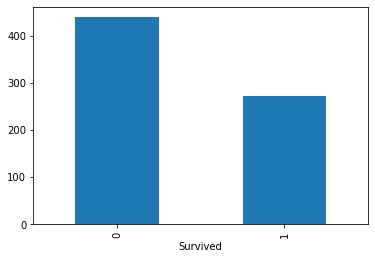

In [22]:
df_train.groupby(['Survived']).size().plot.bar()


In [23]:
df_train.groupby(['Pclass']).size()

Pclass
1    170
2    148
3    394
dtype: int64

In [24]:
df_train.groupby(['Pclass']).sum()["Survived"]   #????

Pclass
1    107
2     68
3     98
Name: Survived, dtype: int64

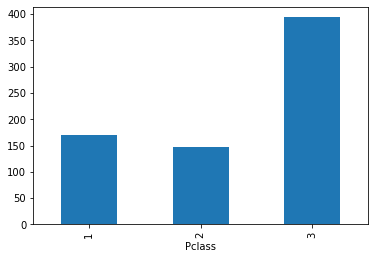

In [25]:
df_train.groupby(['Pclass']).size().plot.bar()

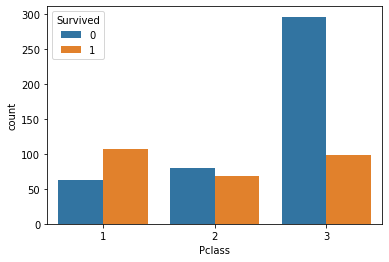

In [26]:
sns.countplot(data=df_train, x="Pclass", hue="Survived")

## Step 3:
Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.

In [27]:
df_train.groupby(['Pclass']).size()

Pclass
1    170
2    148
3    394
dtype: int64

In [28]:
df_train.groupby(['Survived', 'Pclass']).size()

Survived  Pclass
0         1          63
          2          80
          3         296
1         1         107
          2          68
          3          98
dtype: int64

In [29]:
107/170

0.6294117647058823

## Step 4
Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.

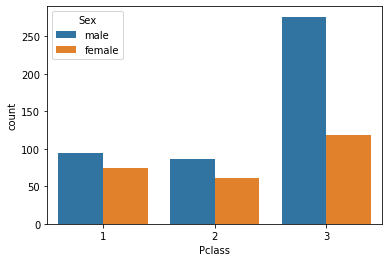

In [30]:
sns.countplot(data=df_train, x="Pclass", hue="Sex")

## Step 5
Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.

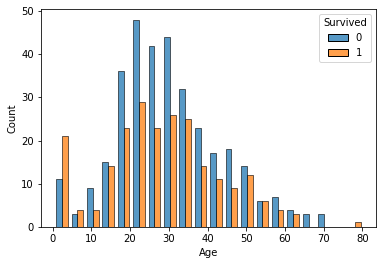

In [31]:

sns.histplot(df_train, x='Age', hue='Survived',
             multiple='dodge', shrink=.75, bins=20);


## Step 6
Calculate the average age for survived and drowned passengers separately.

In [32]:
df_train.groupby('Survived')['Age'].mean()

Survived
0    30.467164
1    28.549869
Name: Age, dtype: float64

## Step 7
Replace missing age values by the mean age.

In [16]:
df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)

## Step 8
Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.

### first approach

In [17]:
df_train.groupby(['Survived', 'Pclass', 'Sex']).size()

Survived  Pclass  Sex   
0         1       female      3
                  male       60
          2       female      6
                  male       74
          3       female     60
                  male      236
1         1       female     72
                  male       35
          2       female     55
                  male       13
          3       female     58
                  male       40
dtype: int64

### second approach

In [20]:
df_train.groupby(['Survived', 'Pclass', 'Sex'])[['Sex']].count()

Sex
Survived Pclass Sex        
0        1      female    3
                male     60
         2      female    6
                male     74
         3      female   60
                male    236
1        1      female   72
                male     35
         2      female   55
                male     13
         3      female   58
                male     40

### for checking if it is true, go step by step

In [21]:
df_train[(df_train['Survived'] ==0) & (df_train['Pclass'] ==1) & (df_train['Sex'] =='female')]['Sex'].value_counts()

female    3
Name: Sex, dtype: int64